# 1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/ECON441B/insurance.csv")

In [ ]:
df.loc[df["sex"]=="female","sex"]=1.
df.loc[df["sex"]=="male","sex"]=0.
df.loc[df["smoker"]=="yes","smoker"]=1.
df.loc[df["smoker"]=="no","smoker"]=0.
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df["region_encode"]=le.fit_transform(df["region"])
df.head()

,age,sex,bmi,children,smoker,region,charges,region_encode
0,19,1.0,27.900,0,1.0,southwest,16884.92400,3
1,18,0.0,33.770,1,0.0,southeast,1725.55230,2
2,28,0.0,33.000,3,0.0,southeast,4449.46200,2
3,33,0.0,22.705,0,0.0,northwest,21984.47061,1
4,32,0.0,28.880,0,0.0,northwest,3866.85520,1


In [ ]:
df=df[["age","sex","bmi","children","smoker","region_encode","charges"]]

# 2.) Split the data into 80/20, in/out sample

In [ ]:
import numpy as np
data=np.array(df.iloc[:,:6])
target=np.array(df.iloc[:,-1])
cut=int((len(data)*0.8)//1)
in_data=data[:cut]
out_data=data[cut:]
in_target=target[:cut]
out_target=target[cut:]

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(in_data)
in_data_scale=scaler.transform(in_data)
out_data_scale=scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV
modCV=LassoCV().fit(in_data_scale,in_target)
a=modCV.alpha_
a

133.34880015958146

# 5.) Run a lambda regression with that Lambda

In [ ]:
from sklearn.linear_model import Lasso
mod1=Lasso(alpha=a).fit(in_data_scale,in_target)

# 6.) Visualize the coefficients 

[3564.26137833    0.         1890.8527485   398.24050447 9324.84227138
 -326.52198757]


<BarContainer object of 6 artists>

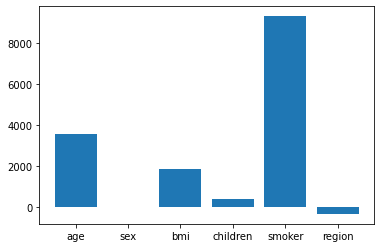

In [ ]:
print(mod1.coef_)
plt.bar(np.array(["age","sex","bmi","children","smoker","region"]),mod1.coef_)#could add a line for 0

# 7.) Interpret the coefficients

Feature importance: From the Lasso coefficients bar plot, variable "smoker" is the most important one, followed by age, bmi, children and region. Variable "sex" has nothing on target data. 

And for the relationship, 4 variables (age, bmi, children, smoker) have positive effects on charges while variable "region" has negative effects. In other words, charges would increase when age, bmi, and the number of children increase and the person is a smoker while would decrease when the region is from northwest to southeast to southwest to northeast.

# 8.) Compare in and out of sample MSE’s

Text(0.5, 1.0, 'In-sample Prediction')

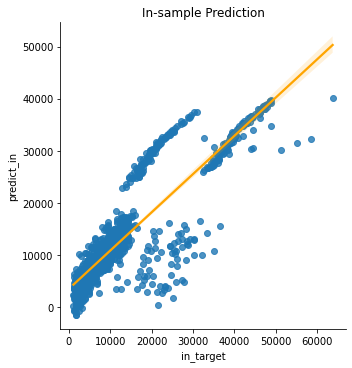

In [ ]:
#should calculate MSE
import seaborn as sn
df1=pd.DataFrame()
df1["in_target"]=in_target
predict_in=mod1.predict(in_data_scale)
df1["predict_in"]=predict_in
predict_in=mod1.predict(in_data_scale)
sn.lmplot(x="in_target",y="predict_in",data=df1,line_kws={"color":"orange"})
plt.title("In-sample Prediction")

Text(0.5, 1.0, 'Out-of-sample Prediction')

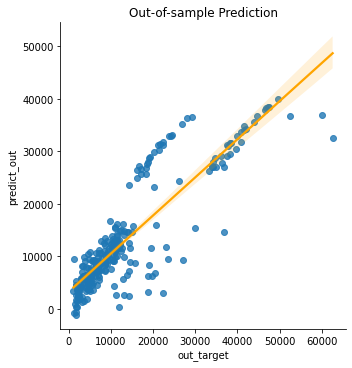

In [ ]:
df2=pd.DataFrame()
df2["out_target"]=out_target
predict_out=mod1.predict(out_data_scale)
df2["predict_out"]=predict_out
sn.lmplot(x="out_target",y="predict_out",data=df2,line_kws={"color":"orange"})
plt.title("Out-of-sample Prediction")